# Problem 4.9

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 4**

**Problem 4.9**



**For the same solar cell parameters of Problem S4.8, study the effect of the ideality factor $n$ on the fill factor FF. Plot the $FF$ vs $n$ for a range $n$=[1, 2]. Do the same but adjusting the saturation current $I_0$ for each ideality factor $n$ so that the V$_{oc}$ remains constant. Discuss the results.**


First, we import the Python modules used, define one constant to set the I-V curve data size, and define the Boltzman constant

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

DATA_SIZE = 500
kB = 8.617333e-5

We define the variables for the I-V curve data

In [2]:
# These are values in the usual range for a typical 16.6 x 16.6 cm2 Si solar cell
Isc = 10.0 # A
I0 = 2e-9 # A
n = 1.2

temperature = 25  #ºC
cell_area = 16.6*16.6 # cm2

Now we define a function to calculate the I-V curve of the solar cell.
Note that we use a number of data points defined as the constant DATA_SIZE. The larger this number, the higher the precision, but also the longer computation time. Since the calculations are not very complex, you can use high numbers with almost instantaenous calculations in modern desktop computers or laptops.

In [3]:
def model_IV(IL, I0, n, Rs, Rp, temperature):
    # Thermal voltage
    kBT = kB*(temperature + 273.15)
    
    #I-V curve stored in a 2-column array: first column for voltages, second column for currents
    IVcurve = np.zeros((DATA_SIZE,2))
    
    # First we calculate the I-V curve voltage range: from -0.1 V to Voc + 0.01 V
    # We want to have the I-V curve crossing the current and voltage axis to see the Isc and Voc
    #Voc without Rs/Rp.
    Voc0 = n*kBT*math.log(IL/I0)
    
    #Create the voltage list
    #Voltage range used: -0.1 to Voc+0.01
    IVcurve[:,0]= np.linspace(-0.1, Voc0+0.01, DATA_SIZE)
    
    #I-V curve without Rs effect
    IVcurve[:,1] = IL - I0*(np.exp(IVcurve[:,0]/(n*kBT))-1) - IVcurve[:,0]/Rp
    
    #Shift voltages to include Rs effect
    IVcurve[:,0] = IVcurve[:,0] - Rs*IVcurve[:,1]
    
    return IVcurve

And another function to get the FF. <br>
Note that this function does not assume that the I-V curve is in the first quadrant. Another two functions are used to calculate the Isc and Voc and detect the quadrant. Then, the function calculating FF moves the I-V curve to this quadrant, if it is not there yet. 

In [4]:
# Obtains Isc by linear interpolation around V=0
def get_Isc(IVdata):
    """Returns the Isc of the input raw I-V curve"""

   # Sort data
    IV_sorted = IVdata.copy()
    IV_sorted=IVdata[IVdata[:,0].argsort()]  # Sort by voltages
    
    Isc = np.interp(0,IV_sorted[:,0],IV_sorted[:,1])
    
    return Isc

# Obtains Voc by linear interpolation around I=0
def get_Voc(IVdata):
    """Returns the Voc of the input raw I-V curve"""

   # Sort data
    IV_sorted = IVdata.copy()
    IV_sorted=IVdata[IVdata[:,1].argsort()]   # Sort by currents
    
    Voc = np.interp(0, IV_sorted[:,1],IV_sorted[:,0])
    
    return Voc

# Obtains the FF
def get_FF(IVdata):
  
   # Sort data and move to 1st quadrant
    IV_sorted = IVdata.copy()
 
    Isc = get_Isc(IV_sorted)
    if Isc<0:
        Isc*=-1
        IV_sorted[:,1]*=-1
    
    Voc = get_Voc(IV_sorted)
    if Voc<0:
        Voc*=-1
        IV_sorted[:,0]*=-1       
 
    IV_sorted=IV_sorted[IV_sorted[:,0].argsort()]   
   
 
    PV = IV_sorted.copy()
    PV[:,1] = IV_sorted[:,0]*IV_sorted[:,1]
    
    Pm = np.amax(PV[:,1])
    FF= abs(Pm/(Isc*Voc))
    
    return FF



We make a graph of fill factor FF vs ideality factor $n$.

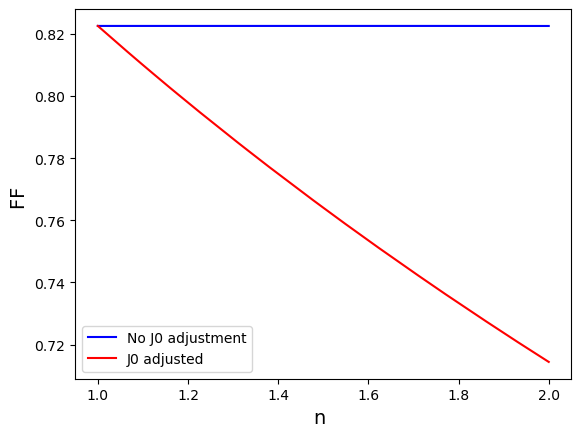

In [5]:
# Two-column arrays for FF vs n
# Create the n list in the first colum
n_min = 1
n_max = 2
FF_vs_n = np.zeros((DATA_SIZE,2))
FF_vs_n[:,0] = np.linspace(n_min, n_max, DATA_SIZE)

FF_vs_n_adjustJ0 = np.zeros((DATA_SIZE,2))
FF_vs_n_adjustJ0[:,0] = np.linspace(n_min, n_max, DATA_SIZE)

# Calculate the Voc for n=1
kBT = kB*(temperature + 273.15)
Voc_n1 = kBT*math.log(Isc/I0+1)

# Calculate the FF for each n
for x in range(DATA_SIZE):
    IV_curve = model_IV(Isc, I0, FF_vs_n[x,0], 0, 1e6, temperature)
    FF = get_FF(IV_curve)
    FF_vs_n[x,1] = FF
    
    adjustedI0 = (Isc/(np.exp(Voc_n1/(FF_vs_n[x,0]*kBT) )-1))
    IV_curve = model_IV(Isc, adjustedI0, FF_vs_n_adjustJ0[x,0], 0, 1e6, temperature)
    FF = get_FF(IV_curve)
    FF_vs_n_adjustJ0[x,1] = FF    
    
# Plot the FF vs n 
plt.plot(FF_vs_n[:,0], FF_vs_n[:,1], color='b', label='No J0 adjustment')
plt.plot(FF_vs_n_adjustJ0[:,0], FF_vs_n_adjustJ0[:,1], color='r', label ='J0 adjusted')
plt.legend()

plt.xlabel('n ', size=14)
plt.ylabel('FF ', size=14)
plt.show()


    

As you can see, the ideality factor n by itself does not affect the FF. <br>
However, if the J$_0$ is adjusted to keep V$_{oc}$ constant, it does. <br>
<br>
Let´s see why by plotting the I-V curves for n=1, n=2 and n=2 adjusting Voc to be constant:

FF for cell with n=1 : 0.823
FF for cell with n=2 : 0.823
FF for cell with n=2 and J0 adjusted: 0.714


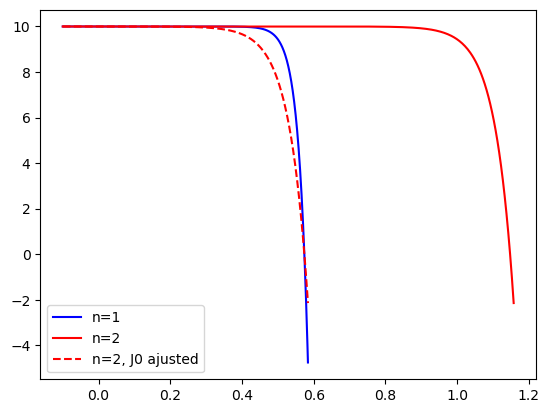

In [6]:
n1 = 1
n2 = 2
IV_curve_n1 = model_IV(Isc, I0, n1, 0, 1e6, temperature)
IV_curve_n2 = model_IV(Isc, I0, n2, 0, 1e6, temperature)

Voc_n1 = kBT*math.log(Isc/I0+1)
adjustedI0 = (Isc/(np.exp(Voc_n1/(2*kBT) )-1))
IV_curve_n2_adj = model_IV(Isc, adjustedI0, 2, 0, 1e6, temperature)

plt.plot(IV_curve_n1[:,0], IV_curve_n1[:,1], color='b', label="n="+str(n1))
plt.plot(IV_curve_n2[:,0], IV_curve_n2[:,1], color='r', label="n="+str(n2))
plt.plot(IV_curve_n2_adj[:,0], IV_curve_n2_adj[:,1], color='r', linestyle='dashed', label="n="+str(n2)+", J0 ajusted")
plt.legend()

FF_n1 = get_FF(IV_curve_n1)
FF_n2 = get_FF(IV_curve_n2)
FF_n2_adj = get_FF(IV_curve_n2_adj)

print("FF for cell with n="+ str(n1) + " : " + f"{FF_n1:.3f}")
print("FF for cell with n="+ str(n2) + " : " + f"{FF_n2:.3f}")
print("FF for cell with n="+ str(n2) + " and J0 adjusted: " + f"{FF_n2_adj:.3f}")

You can see that the ideality factor affects the squareness of the I-V curve elbow. If the ideality factor is increased alone, then the increase in Voc compensates for the effect on the FF of this loss in squareness. However, in practice, solar cells with higher ideality factors have usually a higher J$_0$ too, resulting in a lower V$_{oc}$ and FF.